In [ ]:
%matplotlib inline

JMG Notes:  This notebook gives two different examples of using the RBF kernel for classification, both weighted
heavily toward exhibiting visualization techniuques, rather than improving classifier peformance.  Both are from
scikit learn demos.


# Part I: Gaussian process classification (GPC) on iris dataset

This example illustrates the predicted probability of GPC for an isotropic
and anisotropic RBF kernel on a two-dimensional version for the iris-dataset.
The anisotropic RBF kernel obtains slightly higher log-marginal-likelihood (LML) by
assigning different length-scales to the two feature dimensions.


#### How the coloring of Z works

We  start with 977688 = 888*1101 points arranged in
a rectangular meshgrid.

NB This discussion is about the code in the cell below and code in the cell below must be executed
first to use these values in Python.

`xx` and `yy` are a **meshgrid**.  They represent the x and y coordinates of a rectangular grid
of points.

In [26]:
xx.shape,yy.shape.

((888, 1101), (888, 1101))

The matrix `xx` has the same shape as the rectangle whose x-values `xx` stores,
so all the `x`-values in each column are the same. For example:

In [4]:
xx[:,23]

array([3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76,
       3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.76, 3.

To apply a function to the points in the meshgrid we flatten the xx and yy components of the grid and stack 
flattened `xx` on top of flattened `yy`. We predict the probs for each of the 3 classes for each of the points.

In [27]:
# np.c_[xx.ravel(), yy.ravel()] shape: 2 x 977688 
# top row: x coords; bottom row: y coords
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

So here is Zs shape

In [28]:
Z.shape

(977688, 3)

We reshape back into the rectangle but now with 3 layers due to the probs. (Line 34)

In [30]:
Z = Z.reshape((xx.shape[0], xx.shape[1], 3))

In [31]:
Z.shape

(888, 1101, 3)

Here are the probs for the point that was at (0,0) (they add to 1.0).

In [35]:
Z[0,0,:]

array([0.77967334, 0.12060769, 0.09971897])

We are going to use these values as our RGB color values (for the `plt.imshow()` function). Line 35.

What are we looking above is one pixel in the color image.  It will be predominantly red.

The color intensities in the image thus show the probabilities assigned
by the Gaussian classifier.  Points that take on a purplish hue,
for example, are close to the red/blue class boundary, with the probs for the
red and blue classes closer together.

On that image background we scattter the actual data points  (line 42).

The array argument of the `c` (or color) parameter for the `plt.scatter()` function 
looks like this

```
np.array(["r", "g", "b"])[y].
```

`y` has 150 values assigning classes to each member of the dataset:

```
>>> set(y)
{0,1,2}.
````

So, by fancy-indexing, the indices in `y` repeatedly choose one of the colors `["r","g","b"]`.
For example:

In [37]:
np.array(["r", "g", "b"])[y][40:60]


array(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g'], dtype='<U1')

is an array assigning colors by class to each of the members 40:60 of the dataset.  The ordering
`["r", "g", "b"]` of course corresponds to the classifier's RGB color mix. The probability
assigned to pixel layer 0 is realized in the intensity of redness at that pixel: As a result
a data point that has been correctly classified as class 0 should be colored red and should appear on a 
red background.

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

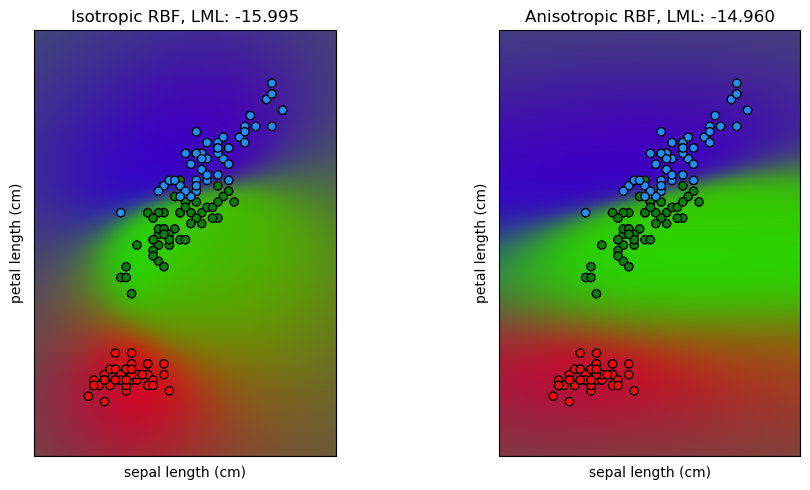

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
feat_inds = [0,2]
X = iris.data[:, feat_inds]  # we only take feat 0 and feat 2 (elsewhere proved out as the best pair.)
y = np.array(iris.target, dtype=int)

h = 0.02  # step size in the mesh

# 1D scaling.
kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)
#  2Dimensional scaling
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic = GaussianProcessClassifier(kernel=kernel).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic RBF", "Anisotropic RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic, gpc_rbf_anisotropic)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=np.array(["r", "g", "dodgerblue"])[y], edgecolors=(0, 0, 0))
    plt.xlabel(iris.feature_names[feat_inds[0]])
    plt.ylabel(iris.feature_names[feat_inds[1]])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
#plt.show()

The greater log marginal likelihood of the training set under the anisotropic model is a win for that model,
but it has no affect on the scores:

In [14]:
gpc_rbf_anisotropic.score(X,y)

0.96

In [15]:
gpc_rbf_isotropic.score(X,y)

0.96

#### Using the petal/sepal area feats

We demonstrated in the classifier notebook and assignment  that area features 
do almost as well as all 4 features.  

The big win os they are visualizable.   Same visualization method, using
area features:

In [20]:
np.concatenate(cols,axis=1).shape

(150, 2)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# import some data to play with
iris = datasets.load_iris()
X = iris.data
# a list of two cols, one made from cols 0 and 1, one from cols 2 and 3
new_cols = [X[:,i:i+1]*X[:,i+1:i+2] for i in range(0,4,2)]
newX = np.concatenate(new_cols,axis=1)

# sanity check looking for equality
# newX col 0 is sepal area: sepal length x sepal width
print(X[0,0]*X[0,1],newX[0,0])
# newX col 1 is petal area: petal length x petal width
print(X[0,2]*X[0,3],newX[0,1])


17.849999999999998 17.849999999999998
0.27999999999999997 0.27999999999999997


In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

This is the training part, which will take some time:

In [ ]:
    
#X = iris.data[:, :2]  # we only take the first two features.
y = np.array(iris.target, dtype=int)

h = 0.02  # step size in the mesh

kernel = 1.0 * RBF([1.0])
gpc_rbf_isotropic_ar = GaussianProcessClassifier(kernel=kernel).fit(newX, y)
kernel = 1.0 * RBF([1.0, 1.0])
gpc_rbf_anisotropic_ar = GaussianProcessClassifier(kernel=kernel).fit(newX, y)

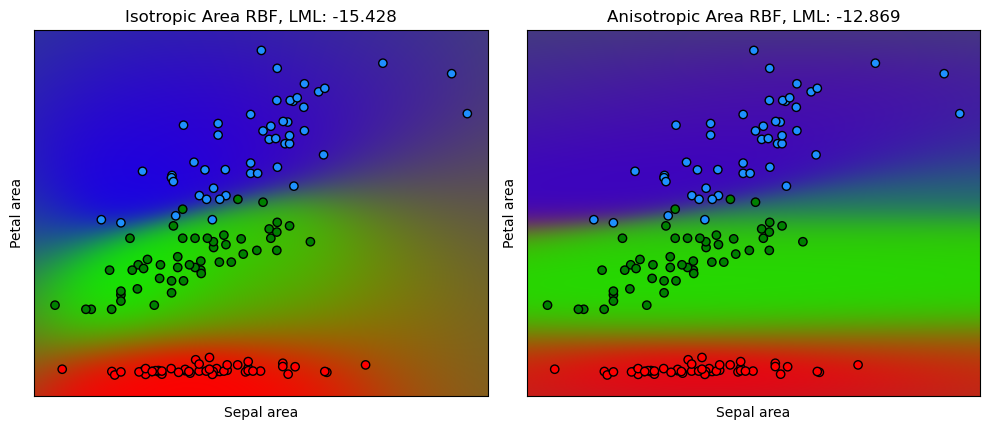

In [25]:
# create a mesh to plot in
x_min, x_max = newX[:, 0].min() - 1, newX[:, 0].max() + 1
y_min, y_max = newX[:, 1].min() - 1, newX[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ["Isotropic Area RBF", "Anisotropic Area RBF"]
plt.figure(figsize=(10, 5))
for i, clf in enumerate((gpc_rbf_isotropic_ar, gpc_rbf_anisotropic_ar)):
    # Plot the predicted probabilities. For that, we will assign a color to
    # each point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(1, 2, i + 1)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape((xx.shape[0], xx.shape[1], 3))
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")

    # Plot the training points
    #plt.scatter(newX[:, 0], newX[:, 1], c=np.array(["r", "g", "b"])[y], edgecolors=(0, 0, 0))
    plt.scatter(newX[:, 0], newX[:, 1], c=np.array(["r", "g", "dodgerblue"])[y], edgecolors=(0, 0, 0))
    plt.xlabel("Sepal area")
    plt.ylabel("Petal area")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

plt.tight_layout()
#plt.show()

And this time the greater marginal log likelihood score does make a difference in performance.

In [23]:
gpc_rbf_isotropic_ar.score(newX,y)

0.98

In [24]:
gpc_rbf_anisotropic_ar.score(newX,y)

0.96


# Part II:  RBF SVM parameters

This example illustrates the effect of the parameters ``gamma`` and ``C`` of
the Radial Basis Function (RBF) kernel SVM.

Intuitively, the ``gamma`` parameter defines how far the influence of a single
training example reaches, with low values meaning 'far' and high values meaning
'close'. The ``gamma`` parameters can be seen as the inverse of the radius of
influence of samples selected by the model as support vectors.

The ``C`` parameter trades off correct classification of training examples
against maximization of the decision function's margin. For larger values of
``C``, a smaller margin will be accepted if the decision function is better at
classifying all training points correctly. A lower ``C`` will encourage a
larger margin, therefore a simpler decision function, at the cost of training
accuracy. In other words ``C`` behaves as a regularization parameter in the
SVM.

The first plot is a visualization of the decision function for a variety of
parameter values on a simplified classification problem involving only 2 input
features and 2 possible target classes (binary classification). Note that this
kind of plot is not possible to do for problems with more features or target
classes.

The second plot is a heatmap of the classifier's cross-validation accuracy as a
function of ``C`` and ``gamma``. For this example we explore a relatively large
grid for illustration purposes. In practice, a logarithmic grid from
$10^{-3}$ to $10^3$ is usually sufficient. If the best parameters
lie on the boundaries of the grid, it can be extended in that direction in a
subsequent search.

Note that the heat map plot has a special colorbar with a midpoint value close
to the score values of the best performing models so as to make it easy to tell
them apart in the blink of an eye.

The behavior of the model is very sensitive to the ``gamma`` parameter. If
``gamma`` is too large, the radius of the area of influence of the support
vectors only includes the support vector itself and no amount of
regularization with ``C`` will be able to prevent overfitting.

When ``gamma`` is very small, the model is too constrained and cannot capture
the complexity or "shape" of the data. The region of influence of any selected
support vector would include the whole training set. The resulting model will
behave similarly to a linear model with a set of hyperplanes that separate the
centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can
be found on a diagonal of ``C`` and ``gamma``. Smooth models (lower ``gamma``
values) can be made more complex by increasing the importance of classifying
each point correctly (larger ``C`` values) hence the diagonal of good
performing models.

Finally, one can also observe that for some intermediate values of ``gamma`` we
get equally performing models when ``C`` becomes very large. This suggests that
the set of support vectors does not change anymore. The radius of the RBF
kernel alone acts as a good structural regularizer. Increasing ``C`` further
doesn't help, likely because there are no more training points in violation
(inside the margin or wrongly classified), or at least no better solution can
be found. Scores being equal, it may make sense to use the smaller ``C``
values, since very high ``C`` values typically increase fitting time.

On the other hand, lower ``C`` values generally lead to more support vectors,
which may increase prediction time. Therefore, lowering the value of ``C``
involves a trade-off between fitting time and prediction time.

We should also note that small differences in scores results from the random
splits of the cross-validation procedure. Those spurious variations can be
smoothed out by increasing the number of CV iterations ``n_splits`` at the
expense of compute time. Increasing the value number of ``C_range`` and
``gamma_range`` steps will increase the resolution of the hyper-parameter heat
map.


Utility class to move the midpoint of a colormap to be around
the values of interest.



In [9]:
import numpy as np
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Load and prepare data set

dataset for grid search



In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Dataset for decision function visualization: we only keep the first two
features in X and sub-sample the dataset to keep only 2 classes and
make it a binary classification problem.



In [2]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

It is usually a good idea to scale the data for SVM training.
We are cheating a bit in this example in scaling all of the data,
instead of fitting the transformation on the training set and
just applying it on the test set.



In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

## Train classifiers

For an initial search, a logarithmic grid with basis
10 is often helpful. Using a basis of 2, a finer
tuning can be achieved but at a much higher cost.



In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import numpy as np

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


Now we need to fit a classifier for all parameters in the 2d version
(we use a smaller set of parameters here because it takes a while to train)



In [6]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

## Visualization

Draw visualization of parameter effects.  Here the colors represent decision function scores,
not probs technically, but something that correlates with the distance of test points
from the sample boundary: the more distant, the higher the decision score, and visually,
the greater the intensity of the class color.

All classifiers are SVC 



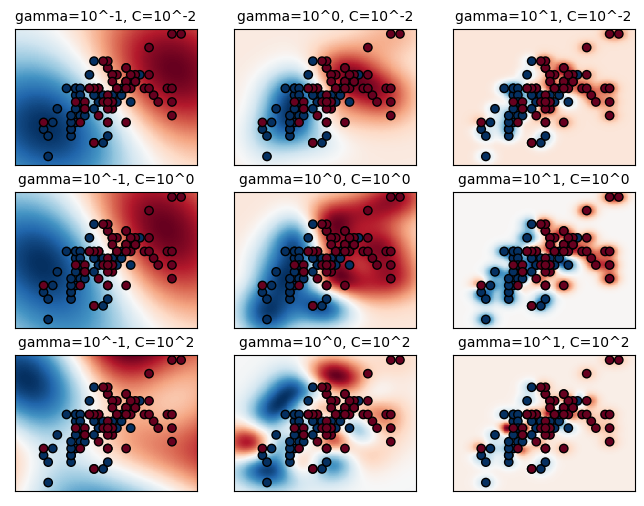

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")



Draw heatmap of the validation accuracy as a function of gamma and C

The score are encoded as colors with the hot colormap which varies from dark
red to bright yellow. As the most interesting scores are all located in the
0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
as to make it easier to visualize the small variations of score values in the
interesting range while not brutally collapsing all the low score values to
the same color.

Scores is a 13x13 groid containing the scores from each parameter combination in the grid 
search.  We color a 13x 13 image grid by score.  X-axis is gamma, Y is C.  Best resuklts
in teh neighborhood of 10, 1.0.


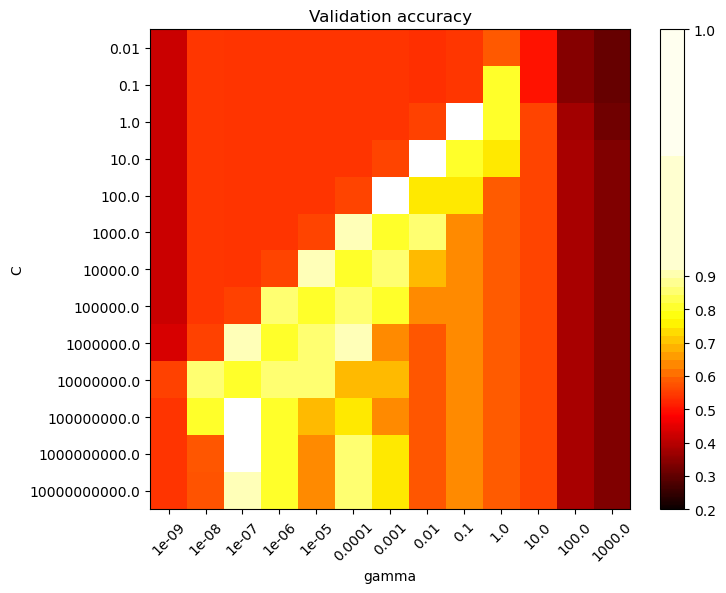

In [10]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92), # set where you want the colormap midpoint color to go
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()